In [ ]:

# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


Dataset1

In [ ]:
path_1 = '/content/Weekly_Provisional_Counts_of_Deaths_by_State_and_Select_Causes.xlsx'

df1 = pd.read_excel(path_1)

df1

,Data As Of,Jurisdiction of Occurrence,MMWR Year,MMWR Month,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),...,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,2023-03-01,United States,2020,1,1,2020-01-04,60475.0,55217.0,846.0,11613.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-01,United States,2020,1,2,2020-01-11,60735.0,55754.0,861.0,11962.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-03-01,United States,2020,1,3,2020-01-18,59362.0,54516.0,829.0,11701.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-03-01,United States,2020,1,4,2020-01-25,59162.0,54401.0,828.0,11879.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-03-01,United States,2020,2,5,2020-02-01,58843.0,54006.0,811.0,11963.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8851,2023-03-01,Puerto Rico,2023,1,3,2023-01-21,692.0,657.0,18.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8852,2023-03-01,Puerto Rico,2023,1,4,2023-01-28,666.0,635.0,24.0,87.0,...,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN,NaN
8853,2023-03-01,Puerto Rico,2023,2,5,2023-02-04,622.0,608.0,24.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8854,2023-03-01,Puerto Rico,2023,2,6,2023-02-11,488.0,487.0,11.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Renaming columns to be shorter

df1.rename(columns = {'Septicemia (A40-A41)':'Septicemia', 
                     'Malignant neoplasms (C00-C97)':'Malignant_neoplasms',
                     'Diabetes mellitus (E10-E14)':'Diabetes_mellitus',
                     'Alzheimer disease (G30)':'Alzheimer_disease',
                     'Influenza and pneumonia (J09-J18)':'Flu_and_pneumonia',
                     'Chronic lower respiratory diseases (J40-J47)':'CLRD',
                     'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)':'Other_Resp_diseases',
                     'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)':'Kidney_disease',
                     'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)':'Other_disease',
                     'Diseases of heart (I00-I09,I11,I13,I20-I51)':'Heart_disease',
                     'Cerebrovascular diseases (I60-I69)':'Brain_disease',
                     'COVID-19 (U071, Multiple Cause of Death)':'COVID-multiple_cause_of_death',
                     'COVID-19 (U071, Underlying Cause of Death)':'COVID-main_cause_of_death'
                     
                    }, inplace = True)

In [ ]:
#Removing rows from 2023

df = df1[df1['MMWR Year'] != 2023]

#Removing records from United States and Puerto Rico

df = df1[(df1['Jurisdiction of Occurrence'] != 'United States')& (df['Jurisdiction of Occurrence'] != 'Puerto Rico')]

Dataset2 

In [ ]:
path_2 =pd.read_excel('/content/Census Insurance Race .xlsx')

df2 = path_2
df2

,Year,State,Insured,Uninsured,White alone (Ins.),Black or African American alone (Ins.),American Indian and Alaska Native alone (Ins.),Asian alone (Ins.),Native Hawaiian and Other Pacific Islander alone (Ins.),Some other race alone (Ins.),...,< $25k (Ins.),$25k - $49.9k (Ins.),$50k - $74.9k (Ins.),$75k - $99.9k (Ins.),> $100k (Ins.),< $25k (Uins.),$25k - $49.9k (Uins.),$50k - $74.9k (Uins.),$75k - $99.9k (Uins.),> $100k (Uins.)
0,2020,Alabama,4357884,455545,2989400,1133732,20755,60042,1766,49355,...,724388,906024,789410,603816,1290439,143862,127943,82504,43412,51594
1,2020,Alaska,621339,89765,407122,19428,80199,40485,8988,9827,...,50826,82137,101614,87517,287060,9721,15934,17393,14464,29918
2,2020,Arizona,6317548,747778,4760894,282459,237883,222196,12048,380742,...,814484,1176365,1146144,925485,2197817,127549,205190,163128,98663,145212
3,2020,Arkansas,2711291,245980,2067436,409388,15903,41742,7444,65348,...,477033,611026,527815,369338,694648,54791,79009,54372,24290,31117
4,2020,California,36032553,2806173,20389554,2035057,270742,5543768,136026,4792947,...,3738533,5338606,5257050,4596896,16718438,400983,657823,574224,398203,752569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2021,Virginia,7838580,574178,4885307,1424492,29823,541309,N,252855,...,764151,1010115,1071186,968715,3924872,91499,124672,107441,72830,173406
98,2021,Washington,7130322,488053,4838418,271894,81451,691464,48962,345176,...,606138,874417,1000206,941734,3643909,59833,94537,97822,72703,155550
99,2021,West Virginia,1649070,106817,1501745,42851,1797,13346,N,6981,...,304513,344648,290082,217680,473397,23813,28734,22979,12612,18519
100,2021,Wisconsin,5516183,312171,4491936,320260,34916,164201,N,119292,...,578430,879582,955255,839775,2192741,45440,76397,70686,47317,68324


In [ ]:
#Creating new column 'Population' by adding 'Insured' and 'Uninsured' columns

df2['Population'] = df2['Insured'] + df2['Uninsured']

#Moving 'Population' column towards the beginning of dataset
x = df2.pop('Population')
df2.insert(2, 'Population', x )

df2

,Year,State,Population,Insured,Uninsured,White alone (Ins.),Black or African American alone (Ins.),American Indian and Alaska Native alone (Ins.),Asian alone (Ins.),Native Hawaiian and Other Pacific Islander alone (Ins.),...,< $25k (Ins.),$25k - $49.9k (Ins.),$50k - $74.9k (Ins.),$75k - $99.9k (Ins.),> $100k (Ins.),< $25k (Uins.),$25k - $49.9k (Uins.),$50k - $74.9k (Uins.),$75k - $99.9k (Uins.),> $100k (Uins.)
0,2020,Alabama,4813429,4357884,455545,2989400,1133732,20755,60042,1766,...,724388,906024,789410,603816,1290439,143862,127943,82504,43412,51594
1,2020,Alaska,711104,621339,89765,407122,19428,80199,40485,8988,...,50826,82137,101614,87517,287060,9721,15934,17393,14464,29918
2,2020,Arizona,7065326,6317548,747778,4760894,282459,237883,222196,12048,...,814484,1176365,1146144,925485,2197817,127549,205190,163128,98663,145212
3,2020,Arkansas,2957271,2711291,245980,2067436,409388,15903,41742,7444,...,477033,611026,527815,369338,694648,54791,79009,54372,24290,31117
4,2020,California,38838726,36032553,2806173,20389554,2035057,270742,5543768,136026,...,3738533,5338606,5257050,4596896,16718438,400983,657823,574224,398203,752569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2021,Virginia,8412758,7838580,574178,4885307,1424492,29823,541309,N,...,764151,1010115,1071186,968715,3924872,91499,124672,107441,72830,173406
98,2021,Washington,7618375,7130322,488053,4838418,271894,81451,691464,48962,...,606138,874417,1000206,941734,3643909,59833,94537,97822,72703,155550
99,2021,West Virginia,1755887,1649070,106817,1501745,42851,1797,13346,N,...,304513,344648,290082,217680,473397,23813,28734,22979,12612,18519
100,2021,Wisconsin,5828354,5516183,312171,4491936,320260,34916,164201,N,...,578430,879582,955255,839775,2192741,45440,76397,70686,47317,68324


In [ ]:
#Replace records with 'null' values to be 0

df2['American Indian and Alaska Native alone (Ins.)'] = df2['American Indian and Alaska Native alone (Ins.)'].replace(['N'], 0)
df2['Native Hawaiian and Other Pacific Islander alone (Ins.)'] = df2['Native Hawaiian and Other Pacific Islander alone (Ins.)'].replace(['N'], 0)
df2['American Indian and Alaska Native alone (Uins.)'] = df2['American Indian and Alaska Native alone (Uins.)'].replace(['N'], 0)
df2['Native Hawaiian and Other Pacific Islander alone (Uins.)'] = df2['Native Hawaiian and Other Pacific Islander alone (Uins.)'].replace(['N'], 0)

Merging Dataset 

In [ ]:
#Removing columns to be able to aggregate by year

df_deaths = df.drop(['MMWR Month', 'MMWR Week', 'Week Ending Date'], axis=1)

#Creating new dataset that adds up deaths of diseases by year and state

df_deaths = df_deaths.groupby(['Jurisdiction of Occurrence', 'MMWR Year']).sum().reset_index()
df_deaths

#Joining both datasets

new_df = pd.merge(df_deaths, df2,  how='inner', left_on=['Jurisdiction of Occurrence','MMWR Year'], right_on = ['State','Year'])

new_df.head(5)

<ipython-input-8-3d664edc8207>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_deaths = df_deaths.groupby(['Jurisdiction of Occurrence', 'MMWR Year']).sum().reset_index()


,Jurisdiction of Occurrence,MMWR Year,All Cause,Natural Cause,Septicemia,Malignant_neoplasms,Diabetes_mellitus,Alzheimer_disease,Flu_and_pneumonia,CLRD,...,< $25k (Ins.),$25k - $49.9k (Ins.),$50k - $74.9k (Ins.),$75k - $99.9k (Ins.),> $100k (Ins.),< $25k (Uins.),$25k - $49.9k (Uins.),$50k - $74.9k (Uins.),$75k - $99.9k (Uins.),> $100k (Uins.)
0,Alabama,2020,64369.0,59783.0,999.0,10427.0,1431.0,3095.0,1096.0,3435.0,...,724388,906024,789410,603816,1290439,143862,127943,82504,43412,51594
1,Alabama,2021,66961.0,61867.0,1140.0,10205.0,1615.0,2674.0,986.0,3211.0,...,716137,870392,765339,633724,1438245,133527,142386,91490,53030,62401
2,Alaska,2020,5079.0,4284.0,0.0,981.0,0.0,0.0,0.0,0.0,...,50826,82137,101614,87517,287060,9721,15934,17393,14464,29918
3,Alaska,2021,6059.0,5172.0,0.0,1034.0,0.0,0.0,0.0,33.0,...,58540,72737,94110,89586,295659,11558,12508,15935,10170,27618
4,Arizona,2020,78266.0,70302.0,197.0,13105.0,2609.0,3322.0,1150.0,3794.0,...,814484,1176365,1146144,925485,2197817,127549,205190,163128,98663,145212


In [ ]:
new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 101
Data columns (total 62 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Jurisdiction of Occurrence                                102 non-null    object 
 1   MMWR Year                                                 102 non-null    int64  
 2   All Cause                                                 102 non-null    float64
 3   Natural Cause                                             102 non-null    float64
 4   Septicemia                                                102 non-null    float64
 5   Malignant_neoplasms                                       102 non-null    float64
 6   Diabetes_mellitus                                         102 non-null    float64
 7   Alzheimer_disease                                         102 non-null    float64
 8   Flu_and_pneumonia   

Normalizing the data 

In [ ]:
new_df.iloc[:,2:17] = new_df.iloc[:,2:17].div(new_df['Population'], axis=0)

In [ ]:
new_df.iloc[:,20:] = new_df.iloc[:,20:].div(new_df['Population'], axis=0)

In [ ]:
new_df.isnull().sum()


Jurisdiction of Occurrence    0
MMWR Year                     0
All Cause                     0
Natural Cause                 0
Septicemia                    0
                             ..
< $25k (Uins.)                0
$25k - $49.9k (Uins.)         0
$50k - $74.9k (Uins.)         0
$75k - $99.9k (Uins.)         0
> $100k (Uins.)               0
Length: 62, dtype: int64

In [ ]:
#Change Dtype to numeric 
# new_df['Heart_disease'] = new_df['Heart_disease'].astype('int64')


#Random Forest Regression  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

In [ ]:
#Create a target variable 

import pandas as pd

X = new_df[[ 'Insured',
'Uninsured','White alone (Ins.)',
'Black or African American alone (Ins.)',
'American Indian and Alaska Native alone (Ins.)',
'Asian alone (Ins.)',
'Native Hawaiian and Other Pacific Islander alone (Ins.)',
'Two or more races  (Ins.)',
'Hispanic or Latino (of any race) (Ins.)',
'White alone, not Hispanic or Latino (Ins.)',
'White alone (Uins.)',
'Black or African American alone (Uins.)',
'American Indian and Alaska Native alone (Uins.)',
'Asian alone (Uins.)',
'Native Hawaiian and Other Pacific Islander alone (Uins.)',
'Some other race alone (Uins.)',
'Two or more races  (Uins.)',
'Hispanic or Latino (of any race) (Uins.)',
'White alone, not Hispanic or Latino (Uins.)',
'Disability (Ins.)',
'No Disability (Ins.)',
'Disability (Uins.)',
'No Disability (Uins.)',
'Less than HS graduate (Ins.)',
'HS graduate (Ins.)',
'Some college (Ins.)',
'Bachelor or higher (Ins.)',
'Less than HS graduate (Uins.)',
'HS graduate (Uins.)',
'Some college (Uins.)',
'Bachelor or higher (Uins.)',
'< $25k (Ins.)',
'$25k - $49.9k (Ins.)',
'$50k - $74.9k (Ins.)',
'$75k - $99.9k (Ins.)',
'> $100k (Ins.)',
'< $25k (Uins.)',
'$25k - $49.9k (Uins.)',
'$50k - $74.9k (Uins.)',
'$75k - $99.9k (Uins.)',
'> $100k (Uins.)']]

y = new_df['Heart_disease']

In [ ]:
#Spliting the dataset into two parts Training and Testing.33% of the data is used for testing. The data is randomly assigned to the training and the test dataset. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

#For the analysis and visualization purpose, list of feature names are created from the original data. 
feature_names = X.columns

In [ ]:
# Flattens the data into 1d array to ensure that they are in the correct format
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [ ]:
#defining the Hyerparameters 
params = {"n_estimators": 500,"max_depth": 4, "min_samples_split": 5, "warm_start":True,"oob_score":True,"random_state": 42,
}

In [ ]:
# Random forest regression model is initialized and trained on the training data using a pipeline that includes feature scaling with a standard scaler transformer.

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

reg = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(
        n_estimators=500,
        max_depth=4,
        min_samples_split=5,
        warm_start=True,
        oob_score=True,
        random_state=42
    ))
])
reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=4, min_samples_split=5,
                                       n_estimators=500, oob_score=True,
                                       random_state=42, warm_start=True))])

In [ ]:
#predicted target values 
y_pred = reg.predict(X_test)

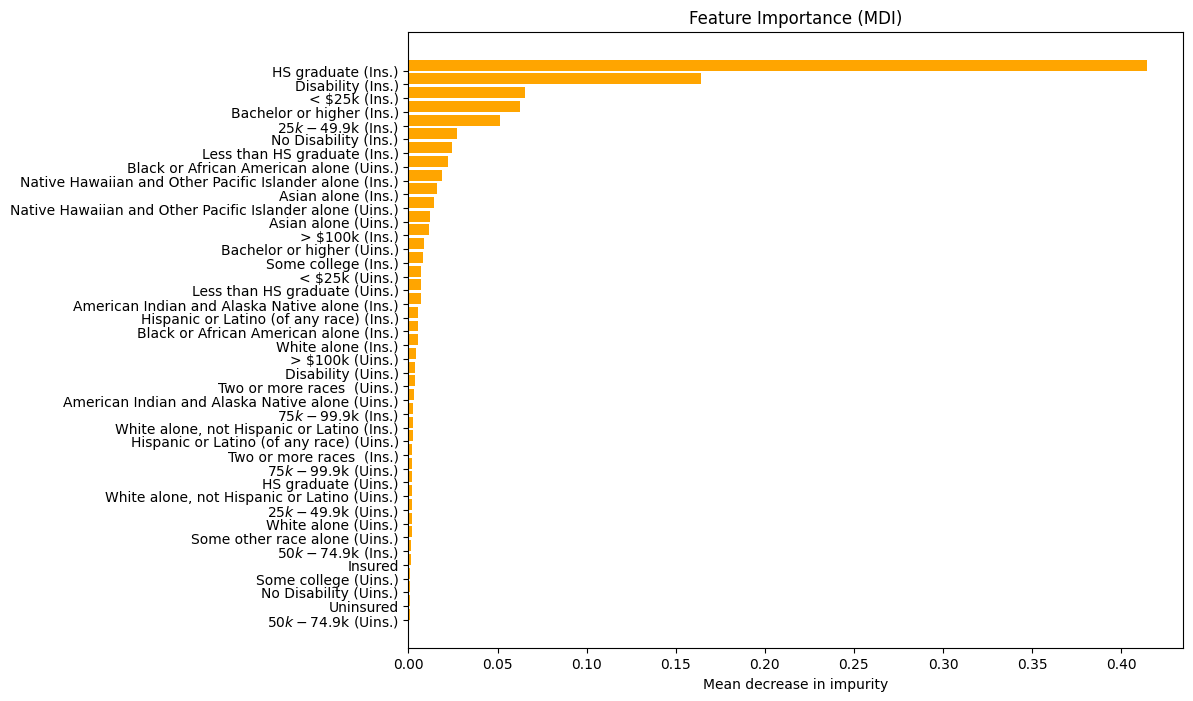

In [ ]:
# obtain feature importance from the last step of the pipeline
feature_importance = reg.named_steps['rf'].feature_importances_

# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.figure(figsize=(10, 8))  # increase the figure size
plt.barh(pos, feature_importance[sorted_idx], align="edge", color="orange")


plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");


In [ ]:

print(X_train.shape)           # should output (n_samples, n_features)
print(feature_importance.shape) # should output (n_features,)


(68, 41)
(41,)


In [ ]:
feature_names = X_train.columns.values


In [ ]:
#Permutation, When a single feature value is randomly shuffled 

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

tree_importances = pd.Series(result.importances_mean, index=feature_names)

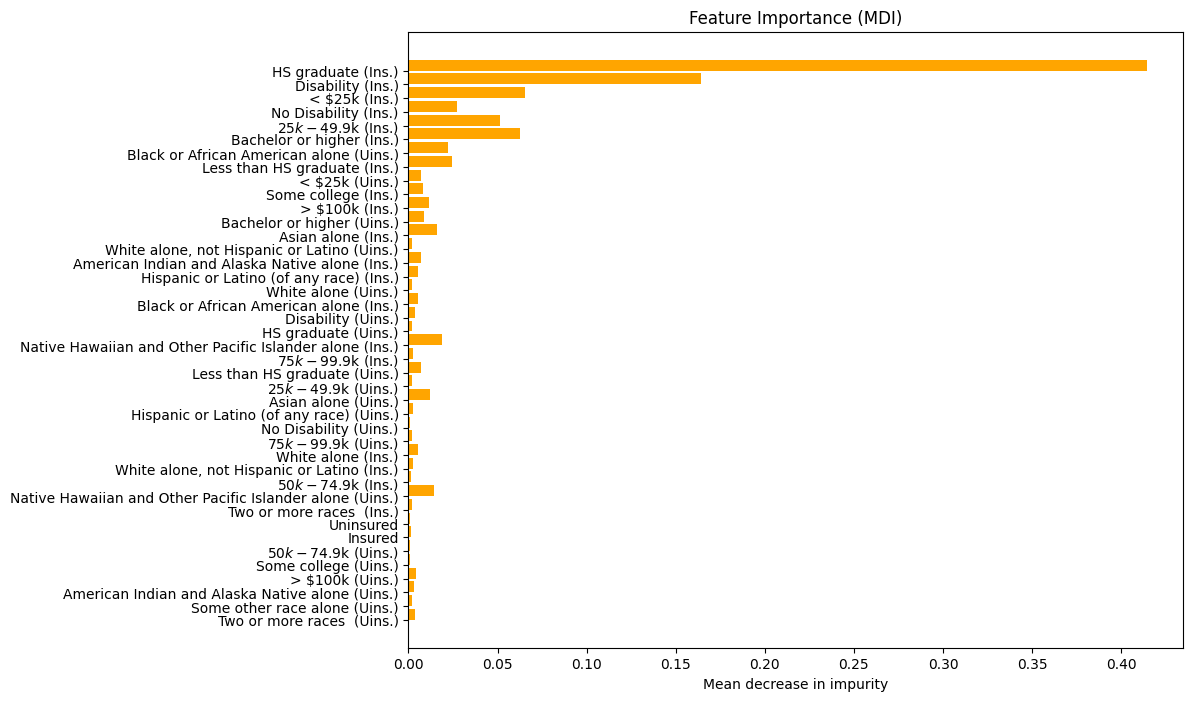

In [ ]:
# sort features according to importance
sorted_idx = np.argsort(tree_importances)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.figure(figsize=(10, 8))  # increase the figure size
plt.barh(pos, feature_importance[sorted_idx], align="edge", color="orange")


plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");

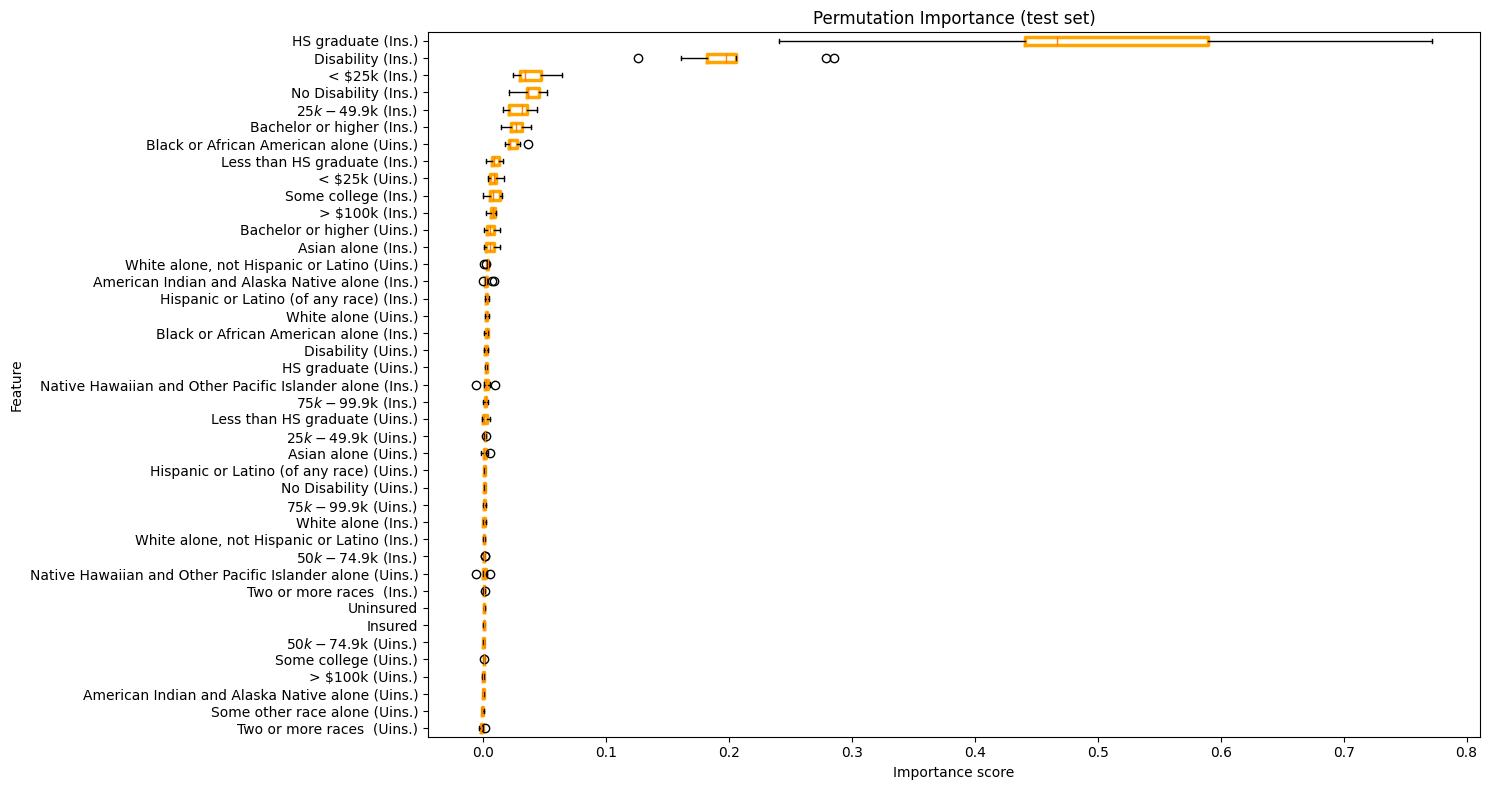

In [ ]:
#Same data in boxplot 

plt.figure(figsize=(15, 8)) # set figure size

# Set box color to green
boxprops = dict(linestyle='-', linewidth=2.5, color='Orange')

plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names)[sorted_idx],
    boxprops=boxprops, # pass boxprops argument to change color
)

plt.title("Permutation Importance (test set)")
plt.xlabel("Importance score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


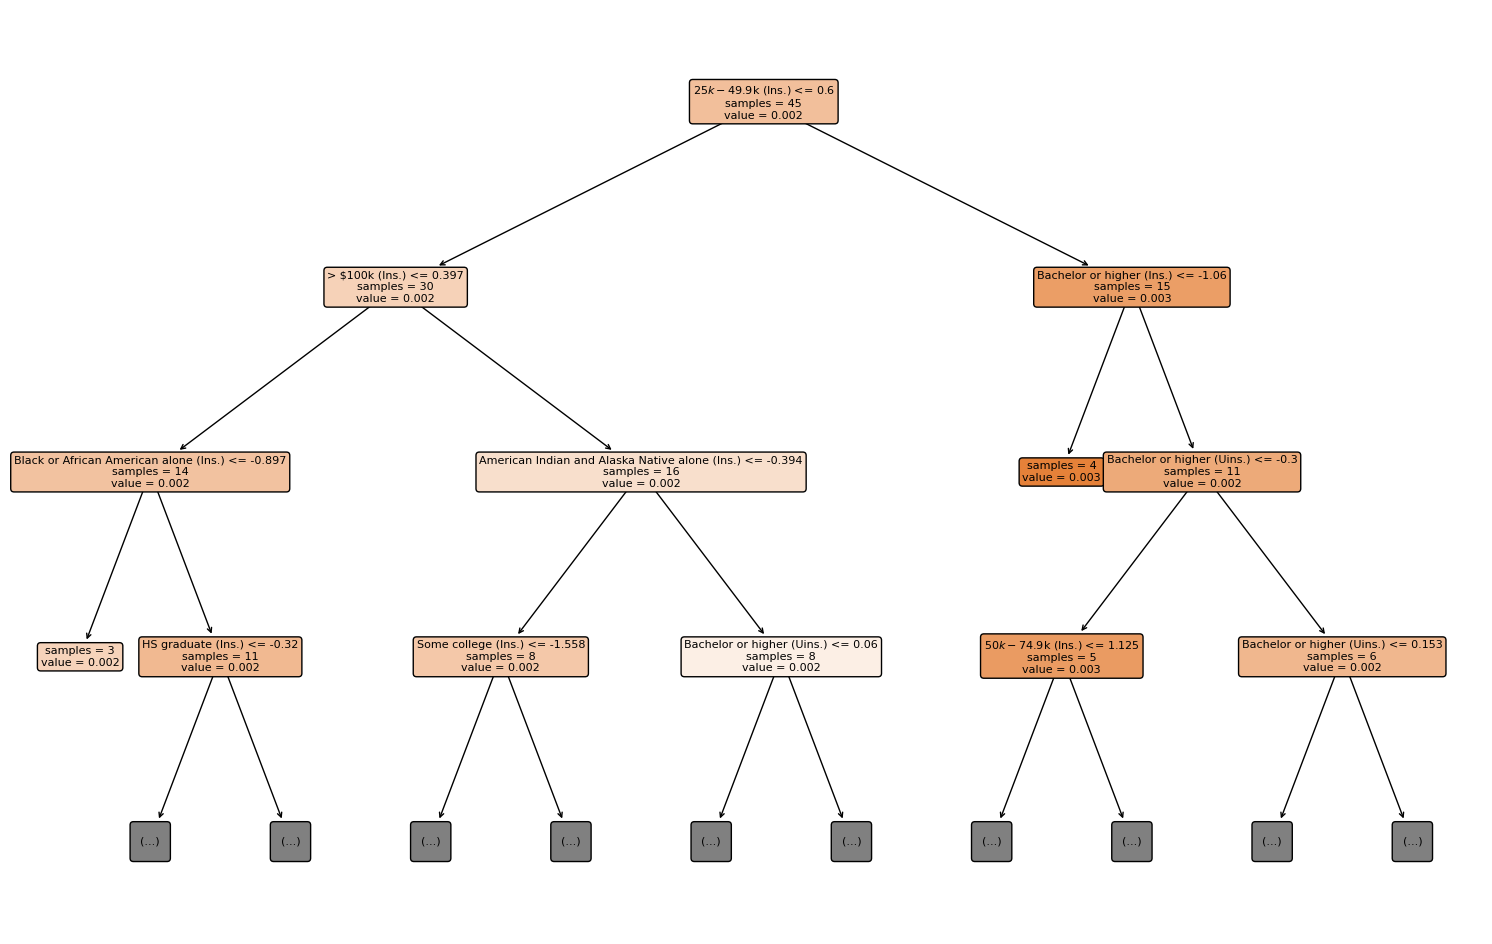

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# access the decision tree estimators from the last step of the pipeline
estimators = reg.named_steps['rf'].estimators_

# plot the first decision tree estimator
plt.figure(figsize=(19, 12))
_ = tree.plot_tree(estimators[0], feature_names=X.columns, filled=True, fontsize=8, rounded=True, max_depth=3, impurity=False)
for node in _[0].get_children():
    if node.get_facecolor() == "#ffffff":
        node.set_facecolor("#87cefa")
plt.show()



In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8238155630992539

R2 Score tells us how well the model is fitted. Closer to 1 indicate our model work well. In our case we got the accuracy score to 82% 

In [ ]:
# get the range of the target variable
target_range = df['Heart_disease'].describe()[['min', 'max']]

print(target_range)

#Evaluate RMSE
mse = mean_squared_error(y_test, y_pred, squared=False)
rmse = mse**.5

print(mse)
print(rmse)

min      10.0
max    1779.0
Name: Heart_disease, dtype: float64
0.00018010047439886238
0.013420151802377735


RMSE of 54.92 may seem small when compared to the range of the target variable (i.e., 10 to 1779),